In [39]:
#General imports.

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
def setint():
    mpld3.enable_notebook()
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10)
def noint():
    mpld3.disable_notebook()
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)


import ROOT as r
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import csv
import pandas

#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import numpy as np
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

plt.rcParams['figure.facecolor'] = 'white'

def toast(text):
    if(len(str(text)) > 100):
        text = str(text)[:100]+" ..."
        print(text)
    status = os.system("powershell.exe -Command 'New-BurntToastNotification -Text \""+str(text)+"\"'")
    if(status == 0):
        print("Toast Notification Sent")
    else:
        print("ERROR: Unable to send toast with message ", text)

noint()

In [40]:
f = r.TFile("./gm2offline_ana.root")

In [41]:
t = f.Get("farline").Get("eastTree")
t.Print()

******************************************************************************
*Tree    :eastTree  : eastTree                                               *
*Entries :   212817 : Total =        50341140 bytes  File  Size =   17289555 *
*        :          : Tree compression factor =   2.91                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :   212817 : Total  Size=     854196 bytes  File Size  =       7239 *
*Baskets :       27 : Basket Size=      32000 bytes  Compression= 117.88     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :   212817 : Total  Size=     854289 bytes  File Size  =       7294 *
*Baskets :       27 : Basket Size=      32000 bytes  Compression= 117.00     *
*...................................................

In [42]:
df = pandas.read_csv("./output.txt",delimiter=' ',header=None)

In [43]:
df.head()

,0,1,2,3,4,5,6,7
0,7,3,---,15977,446,142,7,2
1,9,3,---,15977,446,83,8,2
2,9,3,---,15977,446,83,8,2
3,9,3,---,15977,446,83,8,2
4,6,2,---,15977,446,154,9,2


In [44]:
h = r.TH2D("hist","hist; backwardscounter; n from draw",20,0,20,20,0,20)

In [45]:
h3 = r.TH2D("hist3","hist3; backwardscounter / counter; n from draw",20,0,20,20,0,20)

In [46]:
h2 = r.TH2D("hist2","hist2; backwardscounter; counter",20,0,20,20,0,20)

In [105]:
l1 = []
for i, row in df.iterrows():
    count = 9999
    
    count = t.Draw("energy","islandIndex == "+str(row[5])+" && calorimeterIndex == "+str(row[6])+" && fillIndex == "+str(row[7]))
    
    #count = t.Draw("energyEast","island == "+str(row[4])+" && caloNum == "+str(row[5])+" && fill == "+str(row[6]))
    
    
    if(count < 1000):
        h.Fill(row[0], count)
        h2.Fill(row[0], row[1])
        h3.Fill(int(np.ceil(row[0] / row[1])), count)
        
        l1.append((row[0], row[1], count))
        
    else:
        print("error")

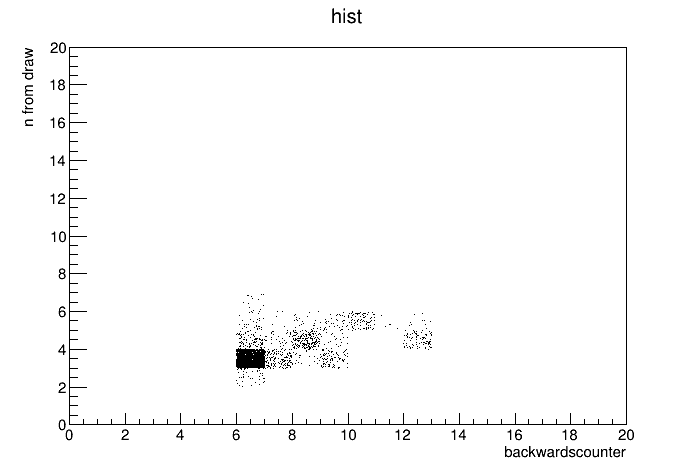

In [106]:
c = r.TCanvas()
h.Draw()
c.Draw()

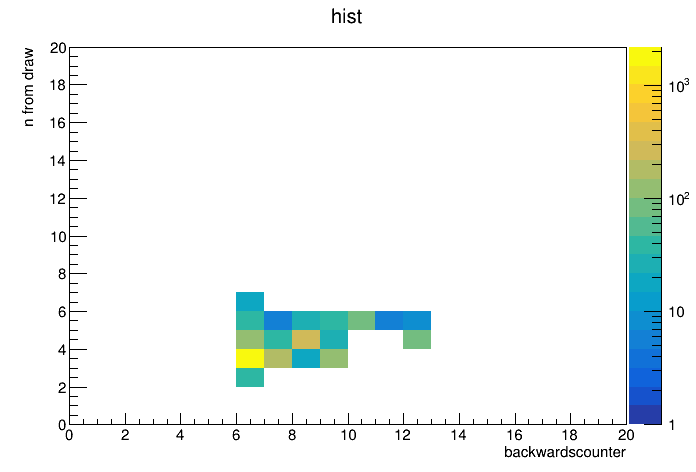

In [107]:
c = r.TCanvas()
h.Draw("colz")
c.SetLogz()
c.Draw()

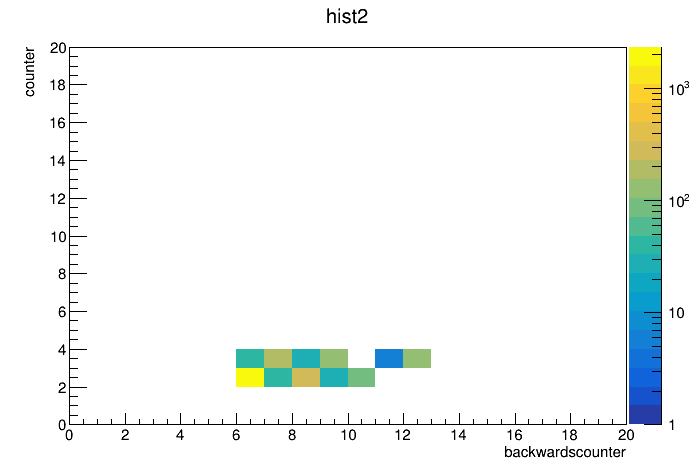

In [108]:
c = r.TCanvas()
h2.Draw("colz")
c.SetLogz()
c.Draw()

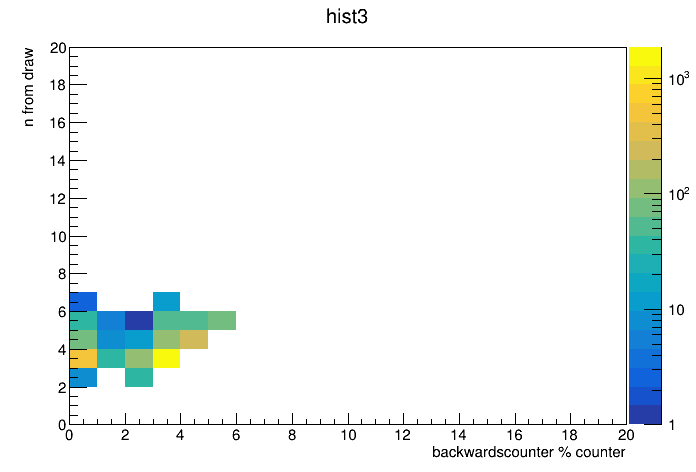

In [109]:
c = r.TCanvas()
h3.Draw("colz")
c.SetLogz()
c.Draw()

In [68]:
df2 = pandas.DataFrame(l1)

In [152]:
df2[3] = np.ceil(df[0] / df[1])
df2[4] = df2[3] - df2[2]
df2[5] = np.ceil(df[0] / df[1]) + (df[0] % df[1])
df2[6] =  (df[0] % df[1])

In [153]:
df2.head()

,0,1,2,3,4,5,6
0,7,3,3,3.0,0.0,4.0,1
1,9,3,3,3.0,0.0,3.0,0
2,9,3,3,3.0,0.0,3.0,0
3,9,3,3,3.0,0.0,3.0,0
4,6,2,3,3.0,0.0,3.0,0


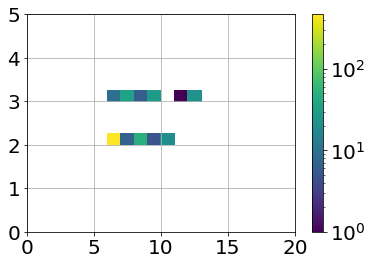

In [154]:
plt.hist2d(df2[0],df2[1], norm=matplotlib.colors.LogNorm(),range=((0,20),(0,5)),bins=(20,20))
plt.grid()
plt.colorbar()
plt.show()

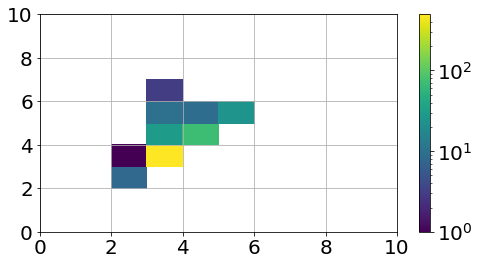

In [155]:
fig,ax = plt.subplots(figsize=(8,4))
plt.hist2d(df2[3],df2[2], norm=matplotlib.colors.LogNorm(),range=((0,10),(0,10)),bins=(10,10))
plt.grid()
plt.colorbar()
plt.show()

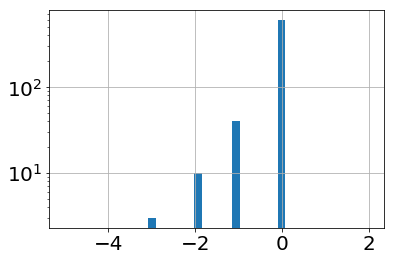

In [156]:
plt.hist(df2[4],range=(-5,2),bins=(40))
plt.yscale('log')
plt.grid()
plt.show()

In [157]:
df3 = df2.loc[df2[4] != 0]

In [158]:
df3.head()

,0,1,2,3,4,5,6
25,11,3,5,4.0,-1.0,6.0,2
26,7,2,5,4.0,-1.0,5.0,1
56,6,2,5,3.0,-2.0,3.0,0
57,6,2,5,3.0,-2.0,3.0,0
58,6,2,5,3.0,-2.0,3.0,0


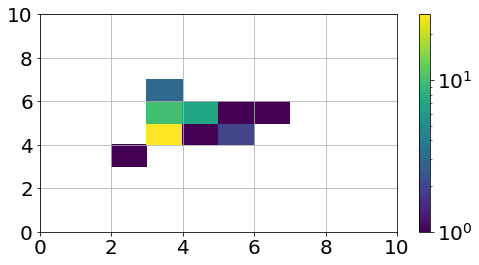

In [159]:
fig,ax = plt.subplots(figsize=(8,4))
plt.hist2d(df3[5],df3[2], norm=matplotlib.colors.LogNorm(),range=((0,10),(0,10)),bins=(10,10))
plt.grid()
plt.colorbar()
plt.show()

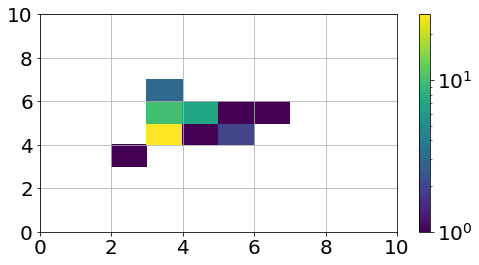

In [160]:
fig,ax = plt.subplots(figsize=(8,4))
plt.hist2d(df3[5],df3[2], norm=matplotlib.colors.LogNorm(),range=((0,10),(0,10)),bins=(10,10))
plt.grid()
plt.colorbar()
plt.show()